In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb
from concurrent.futures import ThreadPoolExecutor, as_completed
import dask.dataframe as dd
import sys
import glob
import os

sys.path.append("../../scripts")
%aimport initial_map
%aimport map_refiner
%aimport complexity
%aimport finder
%aimport preprocess
%aimport complexity
%aimport plotting

import glob
from tqdm import tqdm  # progress bar

# Step 1

In [3]:
EC_AD = finder.Barcode(
    name="AD",
    preceder="GGCTAGC",
    post="",
    length=120
)

EC_AD_BC = finder.Barcode(
    name="AD_BC",
    preceder="CGCGCC",
    post="",
    length=11
)

EC_RPTR_BC = finder.Barcode(
    name="RPTR_BC",
    preceder="CTCGAG",
    post="",
    length=14
)

In [4]:
refiner = map_refiner.MapRefiner(
    db_path="/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/duckdb/GCN4_err_corr.db",
    bc_objects=[EC_AD, EC_AD_BC, EC_RPTR_BC],
    column_pairs=[("RPTR_BC", "AD")],
    design_check=True,
    reads_threshold=50,
    map_order=[
        "barcode_exists",
        "quality",
        "error_corrected",
        "grouped",
        "thresholded",
        "unique_target",
        "designed"
    ],
    step_name="step1",
    should_check_exists=False,
    plot_histograms=True,
    output_figures_path="../../output/GCN4_error_corrected/figures/",
    design_file = "/global/scratch/projects/fc_mvslab/OpenProjects/EChase/TREBLEseq_ismaybethenewcibername/A10_sequencing/v2/current/a10_designfile.csv"
)

Base prefix (stable across descriptors): step1_AD_AD_BC_RPTR_BC_
Full prefix for this instance: step1_AD_AD_BC_RPTR_BC_

Using the following step order:
1. initial
2. barcode_exists
3. quality
4. error_corrected
5. grouped
6. thresholded
7. unique_target
8. designed



In [5]:
# refiner.refine_map_from_db()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Saved loss summary table as 'step1_AD_AD_BC_RPTR_BC_loss_summary'
Done in 5.27 seconds.



<Axes: xlabel='Read Count (Unique, Total)', ylabel='Map Step'>

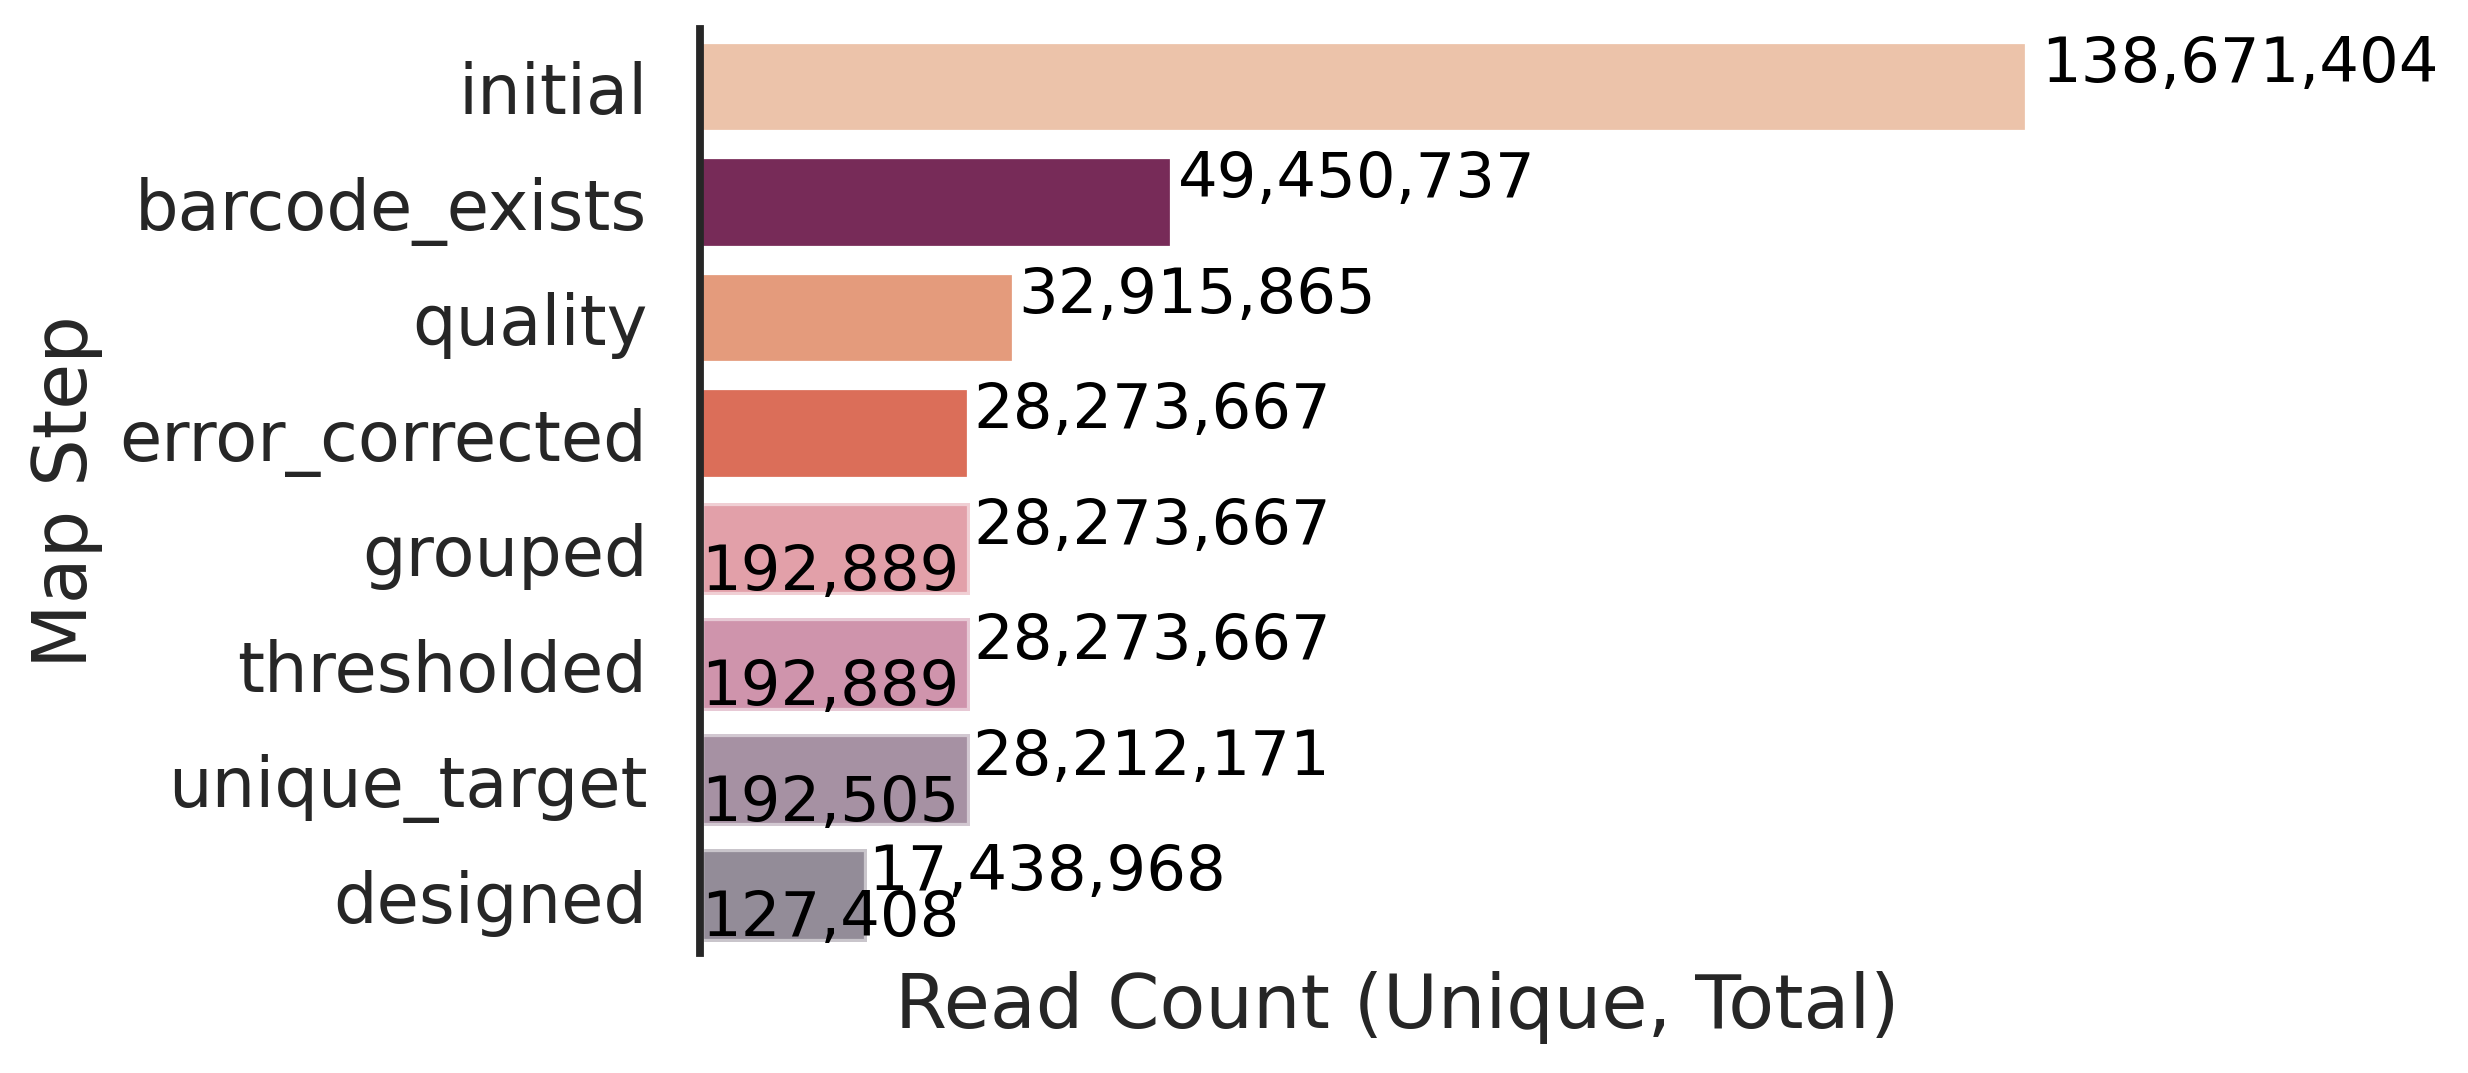

In [7]:
refiner.plot_loss(text_offset =  -0.2)